In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU, Dense, InputLayer, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score, mean_squared_error
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv('./datasets/generate_dataset.csv')
X = data.drop(columns=['y'])
y = data['y']
# print(X.head())
# print(y.head())

In [100]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='exponential')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the entire dataset
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Predict on the training set
y_pred = model.predict(X)

313/313 [==============================] - 0s 1ms/step


In [101]:
# Calculate R^2 score
r2 = r2_score(y, y_pred)
print(f'R^2 score: {r2:.2f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse:.2f}')

R^2 score: 0.87
RMSE: 0.05


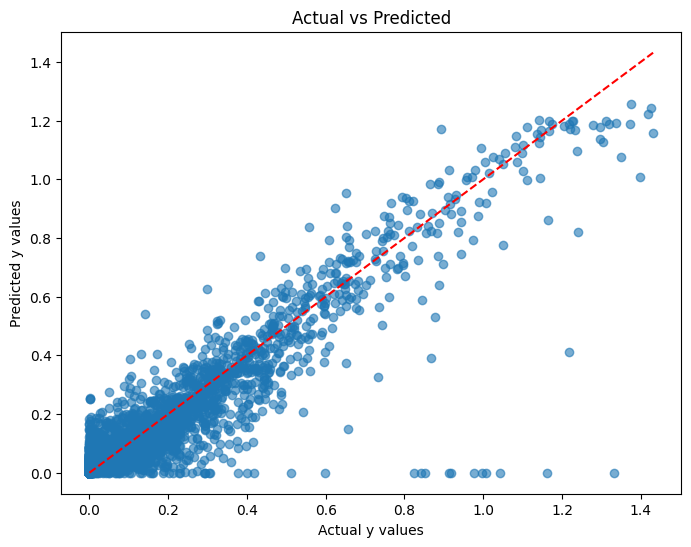

In [102]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual vs Predicted')
plt.show()

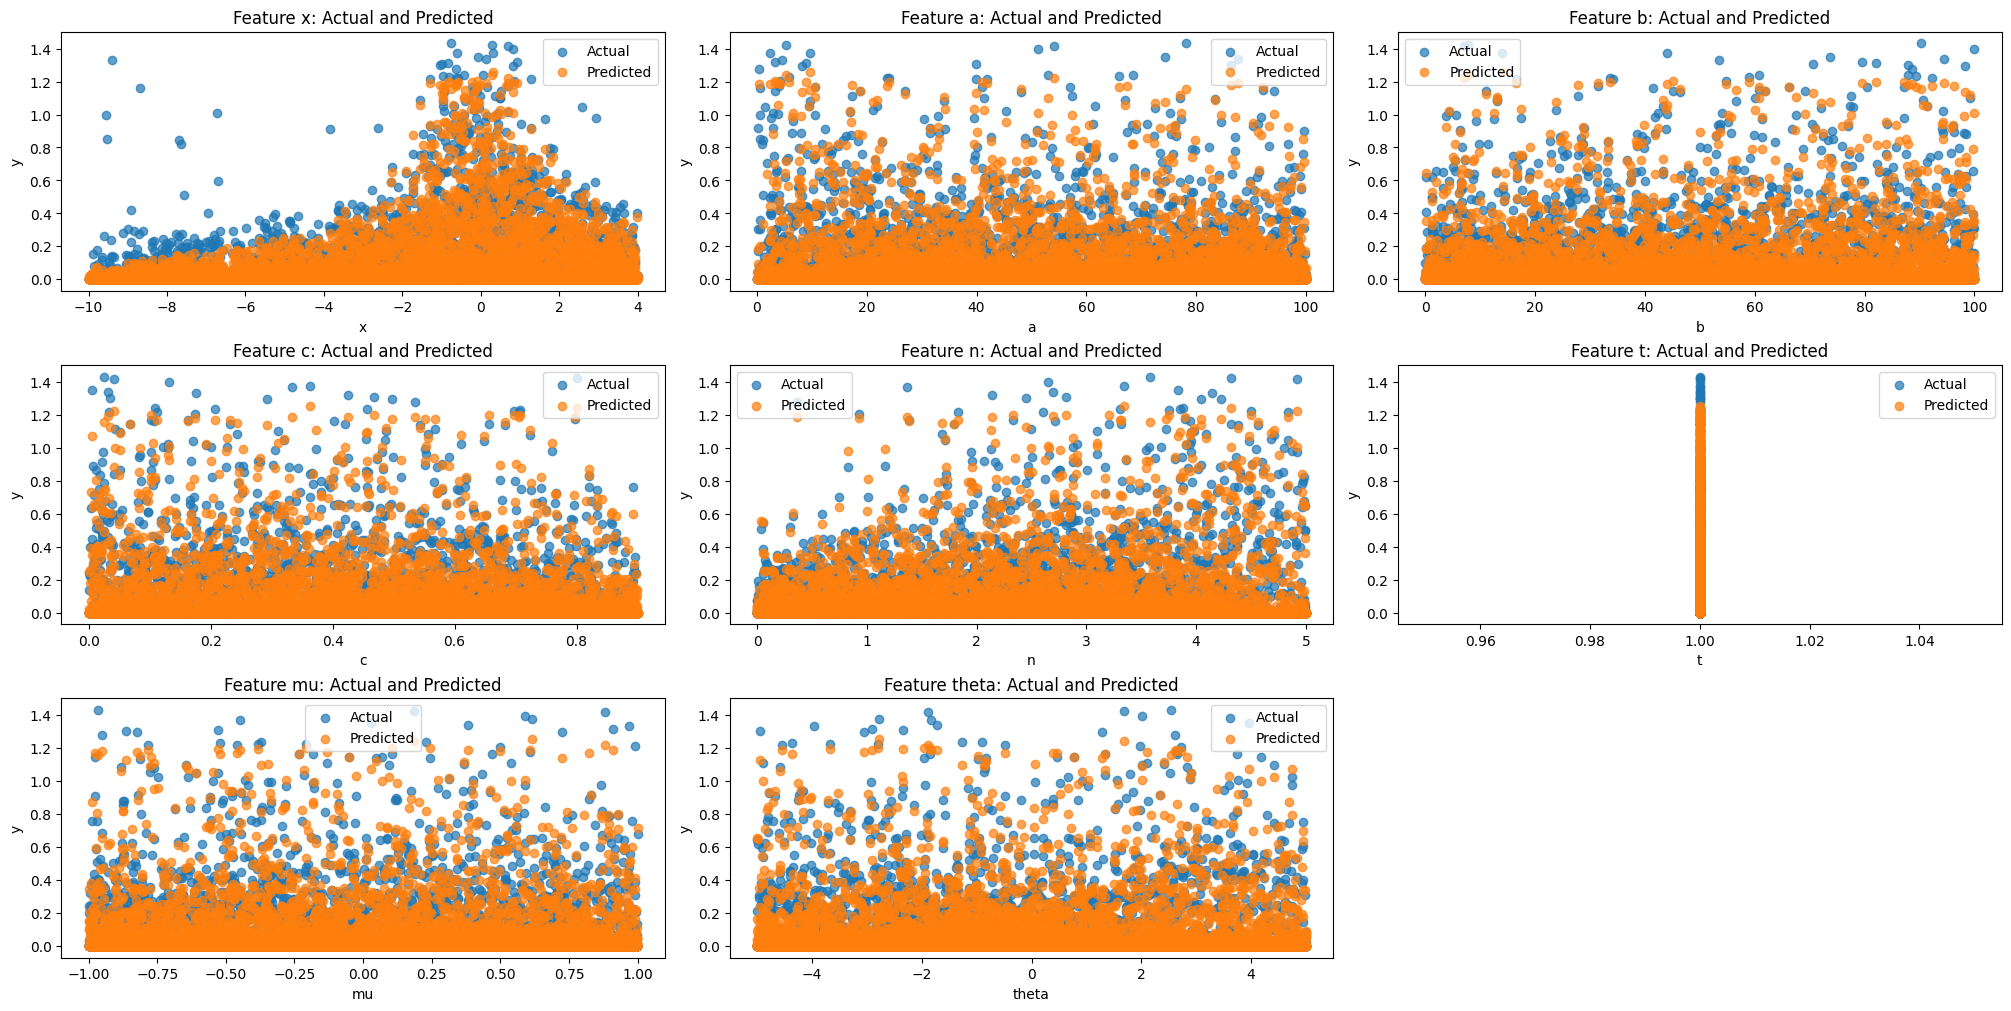

In [103]:
# Number of features
features = X.columns
num_features = len(features)

# Define the number of rows and columns
nrows, ncols = 3, 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against y and y_pred
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(X[feature], y, label='Actual', alpha=0.7)
    ax.scatter(X[feature], y_pred, label='Predicted', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title(f'Feature {feature}: Actual and Predicted')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Show the plot
plt.show()